# Loading in Fasta Files
## Reading in files and cleaning the sequences


In [8]:
from Bio import SeqIO

# Check reading/parsing sequencing for data types
input_file = "C:\\Users\sewar\Documents\Paul\Computer Science\CS4440\delta\gisaid_hcov-19_2023_02_07_18.fasta"
sequences = [fasta for fasta in SeqIO.parse(input_file, 'fasta')]
output_dir = "C:\\Users\sewar\Documents\Paul\Computer Science\CS4440\SARS_CoV_2_Variants\Delta"
print(len(sequences))
print(sequences[1].id)
print(sequences[1].name)
print(type(sequences[0].seq))
print(sequences[1].description)

159
hCoV-19/Canada/PE-NML-55189/2021|EPI_ISL_15184975|2021-04-25
hCoV-19/Canada/PE-NML-55189/2021|EPI_ISL_15184975|2021-04-25
<class 'Bio.Seq.Seq'>
hCoV-19/Canada/PE-NML-55189/2021|EPI_ISL_15184975|2021-04-25


In [9]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os


# Create helper function to read in multiple sequences from path.
def extract_sequences(in_file, out_dir, variant):
    """
    This function will write out FASTA files into seperate files
    :param in_file: Location of FASTA file holding multiple sequences
    :param out_dir: Location to write files to.
    :param variant: Each written file will be in the form variantName_x.fasta with x>=1.
    :return: A string of the location where out files are located
    """
    fasta_sequences = [fasta for fasta in SeqIO.parse(in_file, 'fasta')]  # Exception handling occurs in SeqIO.parse
    proper_letters = ["A", "C", "G", "T"]
    i = 1

    for fasta in fasta_sequences:
        out_filename = out_dir + "\\" + variant + "\\" + variant + "_" + str(i) + ".fasta"
        
        # Ensure all letters in sequence are upper case
        fasta.upper()

        # Ensure only the letters, A, C, G, T are in sequences
        string_seq = str(fasta.seq)
        for letter in string_seq:
            if letter not in proper_letters:
                string_seq = string_seq.replace(letter, '')

        # Write this altered sequence back into a SeqRecord object then into seperate files
        new_fasta = SeqRecord(
            Seq(string_seq),
            id=fasta.id,
            name=fasta.name,
            description=fasta.description,
        )
        SeqIO.write(new_fasta, out_filename, "fasta")
        i += 1
    return out_dir + "\\" + variant + "\\"


In [4]:
# Use helping functions to read in delta and omicron variant sequences.
in_file_delta = "C:\\Users\sewar\Documents\Paul\Computer Science\CS4440\delta\gisaid_hcov-19_2023_02_07_18.fasta"
in_file_omicron = "C:\\Users\sewar\Documents\Paul\Computer Science\CS4440\omicron\gisaid_hcov-19_2023_02_07_18.fasta"

output_directory = "C:\\Users\sewar\Documents\Paul\Computer Science\CS4440\SARS_CoV_2_Variants"

delta_location = extract_sequences(in_file_delta, output_directory, "Delta")
omicron_location = extract_sequences(in_file_omicron,output_directory,"Omicron")

print(delta_location)
print(omicron_location)

C:\Users\sewar\Documents\Paul\Computer Science\CS4440\SARS_CoV_2_Variants\Delta\
C:\Users\sewar\Documents\Paul\Computer Science\CS4440\SARS_CoV_2_Variants\Omicron\


# Reading in several individual Fasta Files from path.
## Reading in files and cleaning the sequences

In [10]:
# Create helper function for reading in multiples files of just one individual sequence.

def read_indiv_sequences(path):
    """
    Reads in every fasta file from directory path paramater.
    :param path: The path to read individual fasta files from.
    :return: A list of Bio.seq corresponding to each fasta file.
    """
    os.chdir(path)
    fasta_sequences = []
    for file in os.listdir():
        if file.endswith(".fasta"):
            file_path = f"{path}\{file}"
            sequence = SeqIO.read(file_path, "fasta")  # Exception handling occurs in SeqIO.read method
            fasta_sequences.append(sequence)
    return fasta_sequences

In [11]:
# Next read in individual files:
delta_sequences = read_indiv_sequences(delta_location)
omicron_sequences = read_indiv_sequences(omicron_location)

# Check a single sequence
print(delta_sequences[2])

# Combine to one list
all_sequences = delta_sequences + omicron_sequences

ID: hCoV-19/Canada/PE-NML-249063/2021|EPI_ISL_15185086|2021-11-19
Name: hCoV-19/Canada/PE-NML-249063/2021|EPI_ISL_15185086|2021-11-19
Description: hCoV-19/Canada/PE-NML-249063/2021|EPI_ISL_15185086|2021-11-19
Number of features: 0
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')


# Create CGR plots for each sequence
## Using a template cgr function

In [12]:
# Use prewritten CGR function to calcuate Chaos Game Representation of each string
def cgr(seq, order, k):
    """
    Creates a two-dimensional numerical representations of the genomic
    sequences using the Chaos Game Representation (CGR)
    :param seq: The String genomic sequence
    :param order: Default order="ACGT"
    :param k: Represents the frequencies of all possible sub-words of length 7
    constructed over the alphabet set {A, C, G, T}.
    :return: 2D plot of CGR
    """
    ln = len(seq)
    pw = 2**k
    out = [[0 for i in range(pw)] for j in range(pw)]
    x = 2**(k-1)
    y = 2**(k-1)

    for i in range(0,ln):
        x=x//2
        y=y//2
        if(seq[i] == order[2] or seq[i] == order[3]):
            x = x + (2**(k-1))
        if(seq[i] == order[0] or seq[i] == order[3]):
            y = y + (2**(k-1))
        if(i>=k-1):
            out[y][x] = out[y][x]+1
    return out

In [14]:
# Create 2d plots of CGR for each sequence

string_of_seq = str(all_sequences[3].seq)
cgr_plot3 = cgr(string_of_seq, "ACGT", 7)

print(cgr_plot3)

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [15]:
# Use numpy to check array shapes

import numpy as np

x = np.array(cgr_plot3)
print(np.shape(x))  # For each sequence, there will be 128 rows and 128 columns(square matrix)

(128, 128)


In [17]:
cgr_plots = []  # Repeat for every sequence.
for sequence in all_sequences:
    string_seq = str(sequence.seq)
    cgr_plots.append(cgr(string_seq, "ACGT", 7))

# Flatten each plot into a 1-D array by concatenating each row:
for i in range(len(cgr_plots)):
    cgr_plots[i] = np.array(cgr_plots[i]).flatten() # This will be required to calculate pairwise distances


# Check the lengths of these 1-d representations.
print(len(cgr_plots))  # Number of plots(rows)
print(len(cgr_plots[1]))  # Number of columns for each plot as a 1-d representation (128x128)

682
16384


## Calculate Euclidean pairwise distances

In [20]:
from sklearn.metrics import pairwise_distances

# Create distance matrix for euclidian pairwise distances amongst each sequence.
distance_matrix = pairwise_distances(cgr_plots, metric='euclidean')
print(np.shape(distance_matrix))
print()
print(distance_matrix)


(682, 682)

[[ 0.         20.68816087 21.72556098 ... 35.65108694 34.82814953
  35.22782991]
 [20.68816087  0.          9.16515139 ... 35.48239    34.7706773
  35.08560959]
 [21.72556098  9.16515139  0.         ... 36.26292873 35.56683849
  35.87478223]
 ...
 [35.65108694 35.48239    36.26292873 ...  0.          9.89949494
   5.29150262]
 [34.82814953 34.7706773  35.56683849 ...  9.89949494  0.
   8.36660027]
 [35.22782991 35.08560959 35.87478223 ...  5.29150262  8.36660027
   0.        ]]


In [21]:
# Check for symmetry

print(distance_matrix[2][2]) # All diagonal values will be zero
print(distance_matrix[1][3]) # This value should be equal to [3][1]
print(distance_matrix[3][1])

0.0
9.16515138991168
9.16515138991168


## Use classical multi-dimensional scaling (MDS) to perform dimensionality reduction

In [22]:
from sklearn.manifold import MDS

# Perform MultiDimensional Scaling on distance matrix.

mds = MDS(n_components=3, dissimilarity='precomputed', normalized_stress='auto')
X_transformed = mds.fit_transform(distance_matrix)

## Data Visualization
### Create a 3D plot of transformed data points from three most significant dimensions

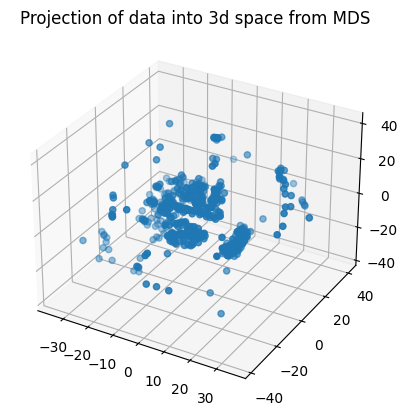

In [24]:
from matplotlib import pyplot as plt

# Plot this data into a 3D space

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2])
plt.title('Projection of data into 3d space from MDS')
plt.show()